### Employees Attrition Prediction

One of the most important topics that concerns HR teams is the attrition rate. It is considered an indicator that measures the quality of work in the company. The higher the attrition rate is, the more effort and time consumed by HR team to start a new hiring cycle.

Our project aims at predicting the attrition for the current employees, so that HR team could approach employees who are expected to leave, and try to retain them.

### The Dataset

Data Description:

* 'avg_monthly_hrs' – Average number of hours worked per month

* 'department' – Department employees belong(ed) to

* 'filed_complaint' – Has the employee filed a formal complaint in the last 3 years?
* 'last_evaluation' – Score for most recent evaluation of employee (higher is better)
* 'n_projects' – Number of projects employee is staffed on
* 'recently_promoted' – Was the employee promoted in the last 3 years?
* 'salary' – Salary level relative to rest of their department
* 'satisfaction' – Score for employee’s satisfaction with the company (higher is better)
* 'status' – Current employment status (Employed / Left)
* 'tenure' – Number of years at the company

### Data Cleaning

In [1]:
# Let's start by importing our libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() #for plot styling 
from sklearn.datasets import make_blobs
import time

In [2]:
# I want to suppress warning messages
import warnings
warnings.filterwarnings('ignore')

In [3]:
# open the file and take a look at the content

import zipfile

with zipfile.ZipFile('archive.zip', 'r') as zip_ref:
    zip_contents = zip_ref.namelist()
    print(zip_contents)

['employee_data (1).csv']


In [4]:
# Now let's read the csv file into a dataset

archive = zipfile.ZipFile('archive.zip', 'r')
file = archive.open('employee_data (1).csv')
df = pd.read_csv(file)
df.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,221,engineering,NaN,0.932868,4,NaN,low,0.829896,Left,5.0
1,232,support,NaN,NaN,3,NaN,low,0.834544,Employed,2.0
2,184,sales,NaN,0.788830,3,NaN,medium,0.834988,Employed,3.0
3,206,sales,NaN,0.575688,4,NaN,low,0.424764,Employed,2.0
4,249,sales,NaN,0.845217,3,NaN,low,0.779043,Employed,3.0


Let's explore our data!

In [5]:
len(df)

14249

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14249 entries, 0 to 14248
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    14249 non-null  int64  
 1   department         13540 non-null  object 
 2   filed_complaint    2058 non-null   float64
 3   last_evaluation    12717 non-null  float64
 4   n_projects         14249 non-null  int64  
 5   recently_promoted  300 non-null    float64
 6   salary             14249 non-null  object 
 7   satisfaction       14068 non-null  float64
 8   status             14249 non-null  object 
 9   tenure             14068 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.1+ MB


In [7]:
# We will check the null values
df.isnull().sum()

avg_monthly_hrs          0
department             709
filed_complaint      12191
last_evaluation       1532
n_projects               0
recently_promoted    13949
salary                   0
satisfaction           181
status                   0
tenure                 181
dtype: int64

In [8]:
# I want to see the values of "recently_promoted" column to see if the null values are missing values or
# this indicated non-promotion
df['recently_promoted'].unique()

array([nan,  1.])

This indicates that null values are employees who were not promoted. We'll do the same for "filed_complaint" column

In [9]:
df['filed_complaint'].unique()

array([nan,  1.])

Same thing. Null values mean employees did not file a complaint. Now let's replace the null values with 0 to encode the column values

In [10]:
df['recently_promoted'].fillna(0, inplace=True)
df['filed_complaint'].fillna(0, inplace=True)

In [11]:
# Let's drop the NA values and reset the index

df.dropna(inplace=True)
df.reset_index(inplace=True,drop=True)
len(df)

12075

In [12]:
df.head(1)

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,221,engineering,0.0,0.932868,4,0.0,low,0.829896,Left,5.0


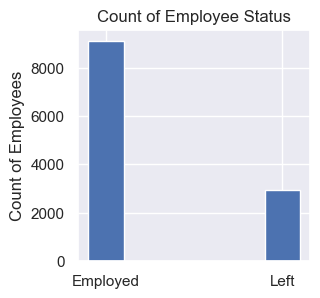

In [13]:
# Let's see the distribution of the "Status" column
plt.figure(figsize=(3,3))
plt.bar(df['status'].value_counts().index, df['status'].value_counts(), width=0.2)
plt.ylabel('Count of Employees')
plt.title('Count of Employee Status')
plt.show()

In [14]:
# # We have 3 columns with categorical values, let's encode them

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')

def encode(df, column_list):
    """Takes in a dataframe and a list of categorical column names, uses One Hot Encoder to return a new encoded dataframe"""    
    for col in column_list:
        one_hot = encoder.fit_transform(df[[col]]).toarray()
        one_hot_df = pd.DataFrame(one_hot)
        one_hot_df.columns = encoder.get_feature_names_out([col])
        df = pd.concat([df, one_hot_df], axis=1)
        df.drop(columns=[col], inplace=True)
    return df

In [15]:
df=encode(df,['department','salary','status'])
df.head()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure,department_IT,department_admin,department_engineering,...,department_marketing,department_procurement,department_product,department_sales,department_support,salary_high,salary_low,salary_medium,status_Employed,status_Left
0,221,0.0,0.932868,4,0.0,0.829896,5.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,184,0.0,0.788830,3,0.0,0.834988,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,206,0.0,0.575688,4,0.0,0.424764,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,249,0.0,0.845217,3,0.0,0.779043,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,140,0.0,0.589097,4,0.0,0.660020,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [16]:
df.columns=[strng.replace("department",'dept.') for strng in df.columns]
df.columns=[strng.replace("nformation_technology",'IT.') for strng in df.columns]

Our main label here is the "Status_Left" column. Let's see how all other columns correlate to it.

In [17]:
ht=df.corr().sort_values(by='status_Left')['status_Left']
ht=pd.DataFrame(ht).T

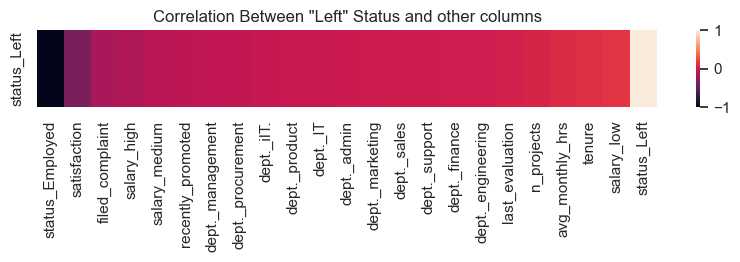

In [18]:
plt.figure(figsize=(10,1))
sns.heatmap(ht)
plt.title('Correlation Between "Left" Status and other columns')
plt.show()

For the "status_Left" column, We will select the highest 2 columns correlated to it, I will select 'satisfaction' from -ve correlation and 'tenure' from +ve correlation, and use them in our prediction model for simplicity.

In [19]:
X=df[['tenure','satisfaction']]
y=df['status_Left']

We need to rescale the "tenure" column to have values between 0 & 1.

In [20]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X['tenure'] = scaler.fit_transform(X[['tenure']].to_numpy())
X.head()

,tenure,satisfaction
0,0.375,0.829896
1,0.125,0.834988
2,0.000,0.424764
3,0.125,0.779043
4,0.250,0.660020


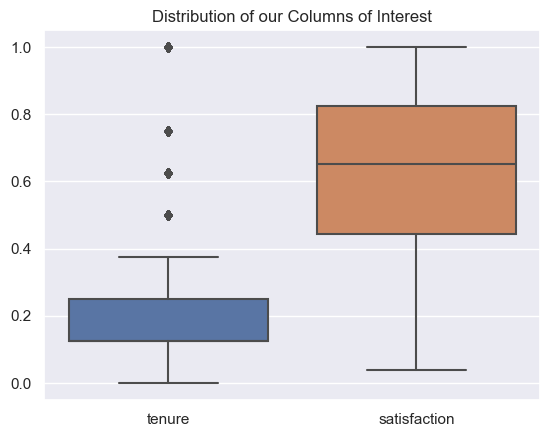

In [21]:
# Let's plot the distribution of both columns
sns.boxplot(X)
plt.title('Distribution of our Columns of Interest');

It seems we have large variability in the "satisfaction" values while our tenure has dense values with some outliers

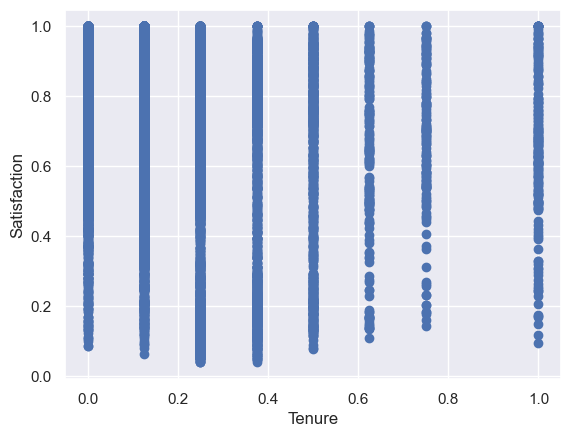

In [22]:
# Let's plot our data

plt.scatter(X['tenure'], X['satisfaction'])
plt.xlabel('Tenure')
plt.ylabel('Satisfaction')
plt.show()

### Part 1: Clustering

#### * K-means Clustering

Now Let's cluster our dataset. We mainly have 2 clusters (Left, Employed), But for the sake of our project, I would like to run the elbow method to see the best number of clusters.

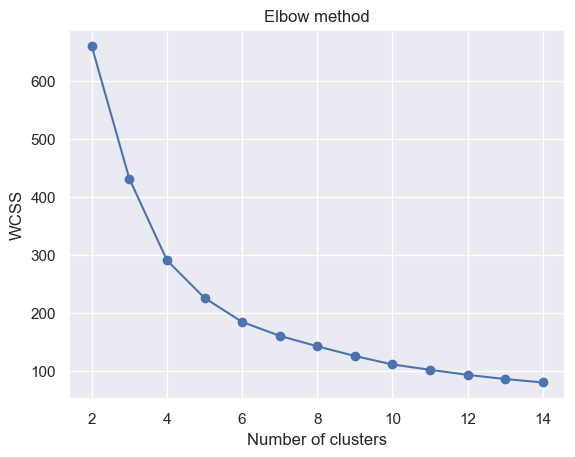

In [23]:
from sklearn.cluster import KMeans

data = X
inertias = []

for i in range(2,15):
    kmeans = KMeans(n_clusters=i)
    kmeans = kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(2,15), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

 Now we will calculate the silhouette coefficient to decide the best k

In [24]:
from sklearn.metrics import silhouette_score

kvals=range(2,15)
silh=[]
for k in kvals:
    kmeans = KMeans(n_clusters=k)
    kmeans = kmeans.fit(X)
    assignment = kmeans.predict(X)
    sil_sc=silhouette_score(X, assignment)
    silh.append(sil_sc)

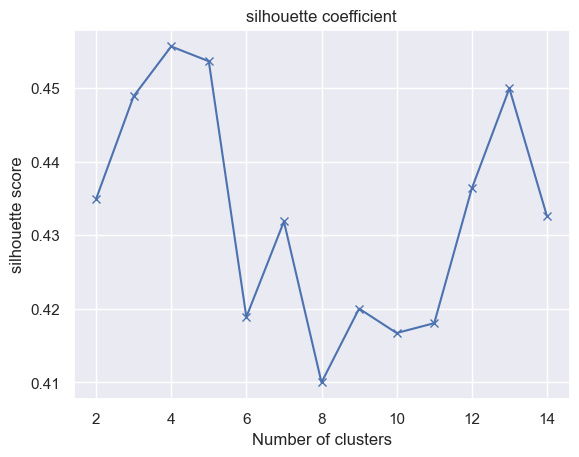

In [25]:
plt.plot(kvals, silh, marker='x')
plt.title('silhouette coefficient')
plt.xlabel('Number of clusters')
plt.ylabel('silhouette score')
plt.show()

Based on the above analyses, we will choose k to be 5. Now we will perform clustering with this value

In [26]:
knn_start = time.time() # we will calculate the running time
k = 5
kmeans = KMeans(n_clusters=k)
kmeans = kmeans.fit(X)
assignment = kmeans.predict(X)
knn_end = time.time()
knn_pred_time=knn_end -knn_start
print('KNN running time is {}'.format(knn_pred_time))

KNN running time is 2.4937024116516113


In [27]:
# Let's get the clusters' centroids
cntrd=kmeans.cluster_centers_
cntrd[1]

array([0.0747968 , 0.83656166])

In [28]:
x_axis=[val[0] for val in cntrd]
y_axis=[val[1] for val in cntrd]

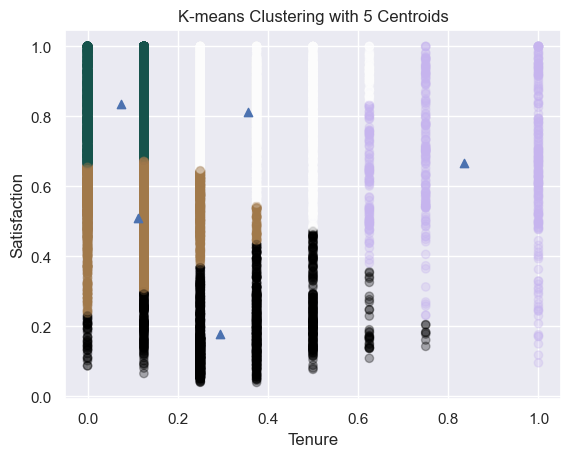

In [29]:
#Let's plot the data with centroids

plt.scatter(X['tenure'],X['satisfaction'], c = kmeans.labels_, cmap='cubehelix',  alpha=0.3)
plt.scatter(x_axis,y_axis,marker = '^')
plt.xlabel('Tenure')
plt.ylabel('Satisfaction')
plt.title("K-means Clustering with 5 Centroids")
plt.show();

Our accuracy in this case could be measured by inertia

In [30]:
knn__acc_start = time.time()
iner=kmeans.inertia_
knn__acc_end = time.time()
knn_acc_time=knn__acc_end-knn__acc_start
print('KNN Accuracy time is {}'.format(knn_acc_time))
iner

KNN Accuracy time is 0.008172035217285156


226.37519449133427

#### * GA algorithm Clustering

In [31]:
from numpy.random import randint
import scipy.stats as ss
import random
import copy
from scipy.spatial.distance import cdist
import imageio

In [32]:
Num_Clusters = 5
Num_samples = 1000
Sample_Dim = 2
Data_lim = [0,3000]
data=np.random.uniform(Data_lim[0],Data_lim[1],(Num_samples,Sample_Dim))

In [33]:

#Problem Definition
Num_Clusters = 5
Num_samples = 12075
Sample_Dim = 2
Data_lim = [0,1]
data = X.values
clusters = [i+1 for i in range(Num_Clusters)]
xpoints = [data[i][0] for i in range(len(data))]
ypoints = [data[i][1] for i in range(len(data))]

In [34]:
#GA Parameters
Num_Gen = 50
Num_Pop = 10
N_c = 50
N_e = 20
N_m = 100 - N_c - N_e
Num_e = (N_e/100)*Num_Pop
Num_c = (N_c/100)*Num_Pop
Num_m = Num_Pop - Num_c - Num_e
Num_Gen_Termination = 50
CO_alpha = 0.2
Mut_Noise = [-0.1*max(Data_lim),max(Data_lim)]

In [35]:
GA_start = time.time()
#Solution Structure

class Solution_Struc:
     def __init__(self, Clusters_Centroids, Data_Assignment,Cost):
            self.Clusters_Centroids = Clusters_Centroids
            self.Data_Assignment = Data_Assignment
            self.Cost = Cost

#Evaluate Obj Fn
def Eval_Obj_Fn(Num_Clusters,data,Clusters_Centroids,Data_Assignment):
    
    Cost = 0
    for i in range(Num_Clusters):
        Cluster_i_Data_ind = list(np.where(np.array(Data_Assignment) == i)[0])
        Cluster_i_Data = [data[Cluster_i_Data_ind[j]] for j in range(len(Cluster_i_Data_ind))]
        try:
            cluster_i_data_Cost = cdist(Cluster_i_Data, np.array([Clusters_Centroids[i]]),'euclidean')
        except:
            cluster_i_data_Cost = [np.inf]
        cluster_i_Cost = sum(cluster_i_data_Cost)# + 100*len(Cluster_i_Data_ind)
        Cost = Cost + cluster_i_Cost
  
    return Cost

#Generate Clusters Centroids

def Gen_Cluster_Centroid(Num_Clusters,data,Data_Assignment,Clusters_Centroids_init):
    Clusters_Centroids = []
    for i in range(Num_Clusters):
        Cluster_i_Data_ind = list(np.where(np.array(Data_Assignment) == i)[0])

        Cluster_i_Data = [data[Cluster_i_Data_ind[j]] for j in range(len(Cluster_i_Data_ind))]
        try:
            Cluster_i_Centroid = list(np.mean(Cluster_i_Data, axis=0))
        except:
            Cluster_i_Centroid = list(Clusters_Centroids_init[i])
        Clusters_Centroids.append(Cluster_i_Centroid)
    
    return Clusters_Centroids

#Generate Clusters Centroids
def Assign_Data(data,Clusters_Centroids_init):
    Data_Assignment = []
    Num_Samples = len(data)
    Num_Clusters = len(Clusters_Centroids_init)
    Dis_Data_i_Clusters = []
    for i in range(Num_Samples):
        Dis_Data_i_Clusters = cdist(np.array(Clusters_Centroids_init), np.array([data[i]]),'euclidean')
        Data_Assignment.append(np.argmin(Dis_Data_i_Clusters))
    return Data_Assignment

#Generate Single Solution
def Gen_X(Num_Clusters,data,Clusters_Centroids_init):
    #Assign Data into Clusters
    Data_Assignment = Assign_Data(data,Clusters_Centroids_init)

    #Generate Clusters Centroids
    Clusters_Centroids = Gen_Cluster_Centroid(Num_Clusters,data,Data_Assignment,Clusters_Centroids_init)
 
    #Evaluate Obj Fn
    Cost = Eval_Obj_Fn(Num_Clusters,data,Clusters_Centroids,Data_Assignment)
    #Strutcture Solution
    X = Solution_Struc(Clusters_Centroids,Data_Assignment,Cost)
    return X

#Perform Crossover
def Crossover(P1,P2,CO_alpha):
    P1, P2 = np.array(P1), np.array(P2)
    C1 = P1*CO_alpha + P2*(1-CO_alpha)
    C2 = P2*CO_alpha + P1*(1-CO_alpha)
    return C1,C2

#Perform Mutation
def Mutation(P1,Mut_Noise):
    
    Noise = np.random.uniform(Mut_Noise[0],Mut_Noise[1],(len(P1),len(P1[0])))
    C1 = P1 + Noise
    return C1

X_0 = []
for i in range(Num_Pop):
    X_0_i_Clusters_Centroids = np.random.uniform(0,1,(Num_Clusters,Sample_Dim))
    X_0_i = Gen_X(Num_Clusters,data,X_0_i_Clusters_Centroids)
    X_0.append(X_0_i)

Costs = [list(X_0[i].Cost)[0] for i in range(Num_Pop)]

#Generate Solution
X_0 = []
for i in range(Num_Pop):
    X_0_i_Clusters_Centroids = np.random.uniform(0,1,(Num_Clusters,Sample_Dim))
    X_0_i = Gen_X(Num_Clusters,data,X_0_i_Clusters_Centroids)
    X_0.append(X_0_i)

Costs = [list(X_0[i].Cost)[0] for i in range(Num_Pop)]
print(Costs)
Costs_Ranked = np.argsort(Costs)
X_0_Ranked = []
for i in range(Num_Pop):
    X_0_Ranked.append(X_0[Costs_Ranked[i]])

Elite = [X_0_Ranked[0]]
X_i_Prev = copy.deepcopy(X_0_Ranked)

#Generate Solution
if __name__ == "__main__":
#    print('Start of GA')

    for i in range(Num_Gen):
#        print(i)
        X_i = []
#        print('Start of Elite')
        #Apply Elitism 
        for j in range(int(Num_e)):
            X_i.append(copy.deepcopy(X_i_Prev[j]))
  
    #Apply CO
#    print('Start of CO') 
    j = 0
    while len(X_i) < Num_e+Num_c:
        P1 = copy.deepcopy(X_i_Prev[j].Clusters_Centroids)
        P2 = copy.deepcopy(X_i_Prev[j+1].Clusters_Centroids)
   
        #print('P1,P2 = ',P1,P2)
        C1,C2 = Crossover(P1,P2,CO_alpha)
        #print('C1,C2 = ',C1,C2)
        if C1 not in [X_i[k].Data_Assignment for k in range(len(X_i))]:
            X_i_j = Gen_X(Num_Clusters,data,C1)
            X_i.append(X_i_j)
     
        if C2 not in [X_i[k].Data_Assignment for k in range(len(X_i))]:
            X_i_j_1 = Gen_X(Num_Clusters,data,C2)
            X_i.append(X_i_j_1)
    
        j = int(np.mod(j+1,Num_Pop/2))
   
    #Apply Mut
#    print('Start of Mut')
    j = 0
    while len(X_i) < Num_Pop:
        P1 = copy.deepcopy(X_i_Prev[Num_Pop-j-1].Clusters_Centroids)
   
        C1 = Mutation(P1,Mut_Noise)
    
        if C1 not in [X_i[k].Data_Assignment for k in range(len(X_i))]:
        #if Feasability_Chk(C1):
            X_i_j = Gen_X(Num_Clusters,data,C1)
            X_i.append(X_i_j)
        j = int(np.mod(j+1,Num_Pop/2))
  
    #Step 2: Rank Population
    Costs = [list(X_i[i].Cost)[0] for i in range(Num_Pop)]
    Costs_Ranked = np.argsort(Costs)
    X_i_Ranked = []
    for i in range(Num_Pop):
        X_i_Ranked.append(X_i[Costs_Ranked[i]])

    Elite.append(X_i_Ranked[0])
    X_i_Prev = copy.deepcopy(X_i_Ranked)
    #print('-----------------------')

#Extract Optimal Solution Data
Optimal_Sol = Elite[len(Elite)-1]
Optimal_Clusters_Centroids = Optimal_Sol.Clusters_Centroids
Optimal_Clusters = Optimal_Sol.Data_Assignment

GA_end = time.time()

[2040.8033877983364, 2237.0912936734558, 2156.6420424454527, 2046.470881180907, 1729.808737899294, 1924.1095468390452, 2093.90126990604, 1928.1663974234007, 1953.5618179340765, 2163.4606422579946]


In [36]:
GA_time= GA_end-GA_start
print('GA running time is {}'.format(GA_time))

GA running time is 17.46400785446167


[[0.761, 0.516184883761443], [0.2607843137254902, 0.19632319011837257], [0.09491440080563948, 0.8486831383922996], [0.13040087800369685, 0.5447506839790194], [0.4750919117647059, 0.8344977573271137]]
[1547.4939422]


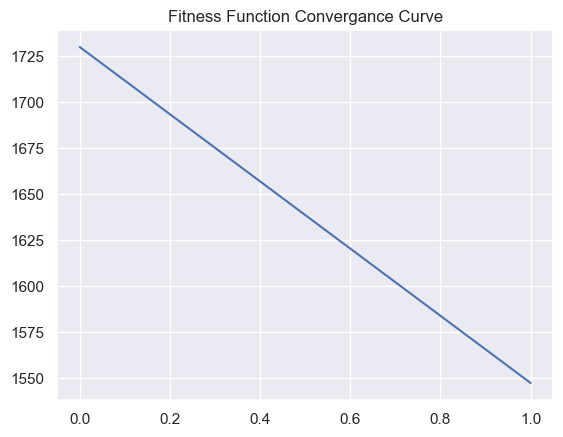

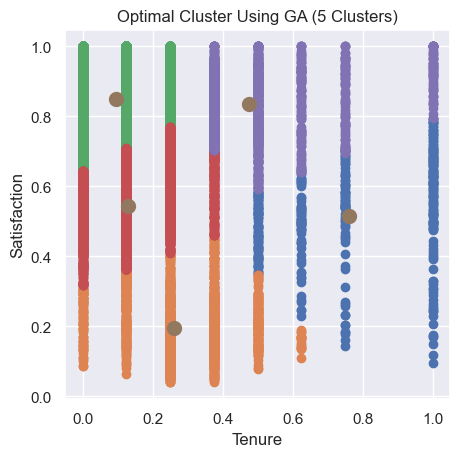

In [37]:
#print(Optimal_Clusters)
print(Optimal_Clusters_Centroids)
print(Optimal_Sol.Cost)

#Convergence Curve
Costs = [Elite[i].Cost for i in range(len(Elite))]
plt.plot(Costs)
plt.title("Fitness Function Convergance Curve")
plt.show()

#plt.scatter(xpoints,ypoints)
#plt.title("Data Distrbution")
#plt.show()

for i in range(Num_Clusters):
    Cluster_i_Data_ind = list(np.where(np.array(Optimal_Clusters) == i)[0])
    Cluster_i_Data = [data[Cluster_i_Data_ind[j]] for j in range(len(Cluster_i_Data_ind))]
    xpoints_Cluster_i = [Cluster_i_Data[i][0] for i in range(len(Cluster_i_Data_ind))]
    ypoints_Cluster_i = [Cluster_i_Data[i][1] for i in range(len(Cluster_i_Data_ind))]
    plt.scatter(xpoints_Cluster_i, ypoints_Cluster_i)
  

xpoints_Cent = [Optimal_Clusters_Centroids[i][0] for i in range(Num_Clusters)]
ypoints_Cent = [Optimal_Clusters_Centroids[i][1] for i in range(Num_Clusters)]
plt.scatter(xpoints_Cent,ypoints_Cent, linewidths=5)
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
plt.title("Optimal Cluster Using GA (5 Clusters)")
plt.xlabel('Tenure')
plt.ylabel('Satisfaction')
plt.show()

-----------------------------------

### Part 2: Classification

We will generate new unlabeled data extracted from our original dataset, and will use SVM to classify it

In [38]:
# Let's resample our current data
new_data = X.sample(n=1000, replace=True)
print(len(new_data))
new_data.head()

1000


,tenure,satisfaction
2824,0.125,0.693899
9581,0.125,0.481880
4726,0.375,0.076768
12033,0.125,0.887839
5582,0.000,0.576355


#### * SVM Classification

Now Let's train a SVM and then use it to classify the new data.

In [39]:
from sklearn import svm
from sklearn.metrics import confusion_matrix, accuracy_score 

In [40]:
# Since we have quite a large number of observations and we need to test different training hyper-parameters, Let's 
# split our data to training/validation/test sets with the ratio 70/15/15 and use the validation set to tune our hyperparameters

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=1)

In [41]:
# We have mainly 3 important hyperparametes that can affect the training accuracy [ C, kernel, gamma]
# let's try different values for them and select the values that will give us the best accuracy

hyperparameters={'C': [10, 100,1000], 'kernel': ['rbf','linear'], 'gamma':[1, 0.1, 0.01, 0.001]}

In [42]:
acc=[]
def hyper_tune(hyperparameters_dict):
    """Takes a hyperparameter list and try all possible combinations in training SVC"""
    for x in hyperparameters['C']:
        for y in hyperparameters['kernel']:
            for z in hyperparameters['gamma']:
                start = time.time() # we will calculate the running time
                clf = svm.SVC(C=x , kernel=y , gamma =z )
                clf.fit(X_train, y_train)
                yval_pred=clf.predict(X_val)
                pred_time = time.time() # end of training time
                accuracy = accuracy_score(yval_pred,y_val)*100
                acc_time = time.time()
                acc.append([round(accuracy,4), x,y,z, round((pred_time-start),4),round((acc_time-pred_time),4)])
                acc.sort(key= lambda x:x[0], reverse=True)
    return acc

In [43]:
print("[Accuracy, ' C ', 'Kernel', 'gamma', 'trn_time', 'Acc_time']")
hyper_tune(hyperparameters)

[Accuracy, ' C ', 'Kernel', 'gamma', 'trn_time', 'Acc_time']


[[89.6247, 1000, 'rbf', 1, 9.04, 0.0],
 [88.3002, 100, 'rbf', 1, 6.7308, 0.0],
 [85.4305, 10, 'rbf', 1, 6.3752, 0.0],
 [81.8433, 1000, 'rbf', 0.1, 8.2962, 0.0],
 [78.2009, 10, 'rbf', 0.1, 6.6553, 0.0],
 [78.2009, 1000, 'rbf', 0.01, 7.4348, 0.0156],
 [78.0905, 100, 'rbf', 0.1, 6.325, 0.0],
 [74.6137, 10, 'rbf', 0.01, 6.9716, 0.0],
 [74.6137, 10, 'rbf', 0.001, 5.987, 0.0156],
 [74.6137, 10, 'linear', 1, 3.4046, 0.0],
 [74.6137, 10, 'linear', 0.1, 3.406, 0.0],
 [74.6137, 10, 'linear', 0.01, 3.4008, 0.0],
 [74.6137, 10, 'linear', 0.001, 3.4113, 0.0],
 [74.6137, 100, 'rbf', 0.01, 6.8051, 0.0],
 [74.6137, 100, 'rbf', 0.001, 6.9972, 0.0],
 [74.6137, 100, 'linear', 1, 5.5795, 0.0],
 [74.6137, 100, 'linear', 0.1, 5.6375, 0.0],
 [74.6137, 100, 'linear', 0.01, 5.593, 0.0],
 [74.6137, 100, 'linear', 0.001, 5.5802, 0.0],
 [74.6137, 1000, 'rbf', 0.001, 8.2825, 0.0],
 [74.6137, 1000, 'linear', 1, 205.9725, 0.0],
 [74.6137, 1000, 'linear', 0.1, 206.0595, 0.0],
 [74.6137, 1000, 'linear', 0.01, 207.4623

It seems that the best accuracy is obtained for C= 1000, kernel = 'rbf' and Gamma = 1. Also the running time for these parameters was moderate.

Now we will train our model using these parameters and measure the accuracy on the test set

In [65]:
best=hyper_tune(hyperparameters)[0][1:4]
svm_start = time.time() # we will calculate the training time
clf = svm.SVC(C=best[0] , kernel=best[1] , gamma =best[2])
clf.fit(X_train, y_train)
svm_end = time.time() # end of training time
y_predsvm=clf.predict(X_test)
pr_time = time.time()  # end of pred. time

In [66]:
svm_trn=svm_end-svm_start
svm_prd=pr_time-svm_end
print(svm_trn)
print(svm_prd)

8.052862405776978
0.9149758815765381


In [67]:
# Calculate MSE
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_predsvm)
mse

0.09442297073440088

In [68]:
# we will evaluate the accuracy of our model

accuracy = accuracy_score(y_predsvm,y_test)*100
print("Accuracy {}".format(accuracy))

confusion_mat = confusion_matrix(y_test,y_predsvm)
print(confusion_mat)


Accuracy 90.55770292655991
[[1280  121]
 [  50  360]]


In [69]:
# Now we will classify our new data

new_predict=clf.predict(new_data)
print(len(new_predict))
new_predict[:5]

1000


array([0., 1., 1., 0., 0.])

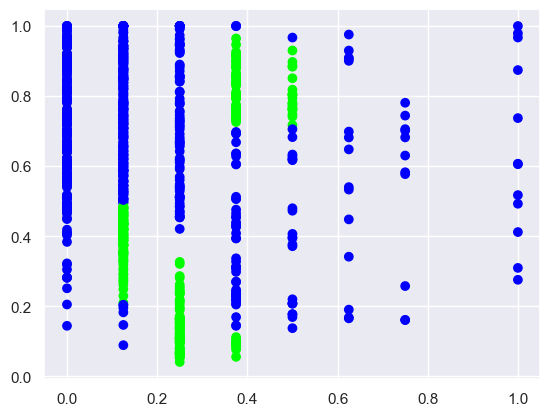

In [77]:
# Let's visualize our new data classes

plt.scatter(new_data['tenure'],new_data['satisfaction'], c = new_predict, cmap='brg')
plt.show();

--------------------------------------------------

#### * ANN Classification

In [49]:
# Now we will import our libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [50]:
# Set random seed for reproducibility
np.random.seed(43)
tf.random.set_seed(43)

In [51]:
# Better shuffle our data before starting
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train, random_state=42)

In [52]:
# We can use our validation set to test a range of hyper-parameters and choose the one that returns the highest accuracy
# Let's define our hyper-parameters

hp={'activation':['relu', 'sigmoid'], 'epochs':[10, 50, 100],
    'optimizer':[tf.keras.optimizers.legacy.Adam(learning_rate=0.1), tf.keras.optimizers.legacy.SGD(learning_rate=0.1)],
    'neurons':[32, 64]}

In [53]:
outcom=[]
def neural_classifier(hyperparameters):
    """Takes in a dictionary of hyperparameters, returns different scenarios for hyperparameter tuning using our datasset"""

    for a in hp['activation']:
        for b in hyperparameters['epochs']:
            for c in hyperparameters['optimizer']:    
                for d in hyperparameters['neurons']:
                    start = time.time() # we will calculate the running time
                    ANN_model = tf.keras.Sequential([layers.Dense(d, activation=a),
                                                     layers.Dense(d, activation=a),
                                                layers.Dense(units=1, activation='sigmoid')])
                                                # output activation sigmoid for binary classification
                    ANN_model.compile(optimizer=c, loss='binary_crossentropy', metrics=['accuracy'])
                    history = ANN_model.fit(X_train, y_train, epochs=b, verbose=0)
                    end = time.time() # end of training time
                    evaluation=ANN_model.evaluate(X_val,y_val,verbose=0)
                    tm= end-start
                    opt = [str(c).replace(str(c),'Adam') if 'Adam' in str(c) else 'SGD'][0]
                    outcom.append([round(evaluation[1],3),a,b,opt,d, round(tm,3)])
                    outcom.sort(key= lambda x:x[0], reverse=True)
    return outcom

In [54]:
# Let's apply our function
print("[Accuracy, activation, epochs, optimizer, #neurons, trn_time]")
oc=neural_classifier(hp)
oc

[Accuracy, activation, epochs, optimizer, #neurons, trn_time]


[[0.909, 'relu', 100, 'SGD', 32, 65.309],
 [0.909, 'relu', 100, 'SGD', 64, 68.124],
 [0.895, 'relu', 10, 'Adam', 32, 8.675],
 [0.869, 'relu', 50, 'SGD', 32, 33.068],
 [0.849, 'relu', 10, 'SGD', 64, 7.444],
 [0.845, 'relu', 10, 'SGD', 32, 7.447],
 [0.837, 'relu', 50, 'SGD', 64, 34.335],
 [0.823, 'sigmoid', 100, 'SGD', 32, 68.501],
 [0.791, 'sigmoid', 50, 'SGD', 64, 35.652],
 [0.783, 'sigmoid', 50, 'SGD', 32, 34.722],
 [0.768, 'sigmoid', 10, 'SGD', 32, 7.617],
 [0.756, 'sigmoid', 10, 'SGD', 64, 7.667],
 [0.746, 'relu', 10, 'Adam', 64, 7.958],
 [0.746, 'relu', 50, 'Adam', 32, 34.296],
 [0.746, 'relu', 50, 'Adam', 64, 35.083],
 [0.746, 'relu', 100, 'Adam', 32, 67.184],
 [0.746, 'relu', 100, 'Adam', 64, 70.672],
 [0.746, 'sigmoid', 10, 'Adam', 32, 7.869],
 [0.746, 'sigmoid', 10, 'Adam', 64, 8.194],
 [0.746, 'sigmoid', 50, 'Adam', 32, 35.148],
 [0.746, 'sigmoid', 50, 'Adam', 64, 36.1],
 [0.746, 'sigmoid', 100, 'Adam', 32, 70.166],
 [0.746, 'sigmoid', 100, 'Adam', 64, 70.722],
 [0.741, 'sigmo

It seems that the best accuracy occured while using the below hyper-parameters:
* 'relu' activation in the hidden layers
* 100 epochs
* SGD optimizer
* 64 number of neurons

Now let's use these parameters to train our model.

In [55]:
bst=oc[0]
bst

[0.909, 'relu', 100, 'SGD', 32, 65.309]

In [56]:
start_time = time.time() # we will calculate the running time
ANN_model = tf.keras.Sequential([layers.Dense(bst[4], activation=bst[1]), 
                                 layers.Dense(bst[4], activation=bst[1]),
                layers.Dense(units=1, activation='sigmoid')])
ANN_model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.1),
                  loss='binary_crossentropy', metrics=['accuracy'])
history = ANN_model.fit(X_train, y_train, epochs=bst[2], verbose=0)
end_time = time.time() # end of training time
evaluation=ANN_model.evaluate(X_test,y_test,verbose=0)
tm= end_time-start_time
print('ANN training time is {}'.format(tm))
print('ANN Accuracy score is {}'.format(evaluation[1]))
evaluation

ANN training time is 67.40416979789734
ANN Accuracy score is 0.859745979309082


[0.30293527245521545, 0.859745979309082]

In [57]:
# Measure the prediction time

pred_start = time.time() # we will calculate the prediction time
y_pred_proba=ANN_model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)
pred_end = time.time() # end of prediction time
pred_tm= pred_end-pred_start
pred_tm

57/57 [==============================] - 0s 3ms/step


0.5726215839385986

In [58]:
history.history['loss']

[0.3994348347187042,
 0.35946840047836304,
 0.3322940766811371,
 0.3235778510570526,
 0.30473607778549194,
 0.32461538910865784,
 0.3116360604763031,
 0.3272368013858795,
 0.3046431243419647,
 0.3069622218608856,
 0.2980399429798126,
 0.2874075770378113,
 0.2903343737125397,
 0.32609760761260986,
 0.29658982157707214,
 0.29342007637023926,
 0.29532375931739807,
 0.29617375135421753,
 0.30526357889175415,
 0.29772675037384033,
 0.28925269842147827,
 0.2971208095550537,
 0.29211515188217163,
 0.30566245317459106,
 0.2963857054710388,
 0.29133597016334534,
 0.2941468358039856,
 0.2957885265350342,
 0.3000715374946594,
 0.2947250306606293,
 0.29889774322509766,
 0.29762887954711914,
 0.29297152161598206,
 0.2950843274593353,
 0.2989794909954071,
 0.30246877670288086,
 0.29388710856437683,
 0.29489341378211975,
 0.2896937429904938,
 0.2897842824459076,
 0.2960357069969177,
 0.32749509811401367,
 0.3204379081726074,
 0.31687575578689575,
 0.31909286975860596,
 0.32164427638053894,
 0.3222880

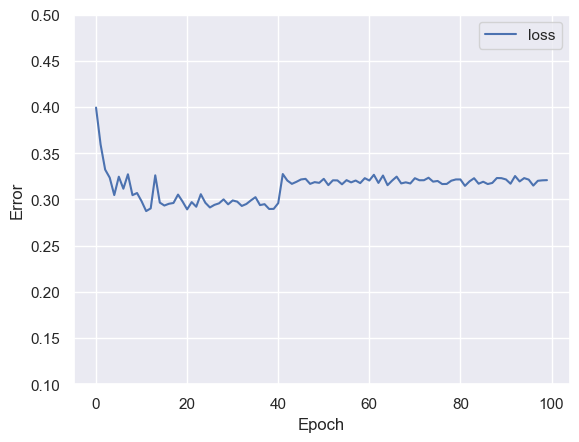

In [59]:
# Let's plot our error figures

plt.plot(history.history['loss'], label='loss')
plt.ylim([0.1, 0.5])
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.grid(True)

In [60]:
# Let's get the MSE for our classifier
ANN_model2 = tf.keras.Sequential([layers.Dense(bst[4], activation=bst[1]), 
                                 layers.Dense(bst[4], activation=bst[1]),
                layers.Dense(units=1, activation='sigmoid')])
ANN_model2.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.1),
                  loss='binary_crossentropy', metrics=['mse'])
history2 = ANN_model2.fit(X_train, y_train, epochs=bst[2], verbose=0)
evaluation2=ANN_model2.evaluate(X_test,y_test,verbose=0)
evaluation2[1]

0.0982016995549202

In [78]:
# Now let's predicat the classes of our newly-generated data

y_pred_proba=ANN_model.predict(new_data)
y_predann = (y_pred_proba > 0.5).astype(int)
y_predann[:10]

32/32 [==============================] - 0s 3ms/step


array([[0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

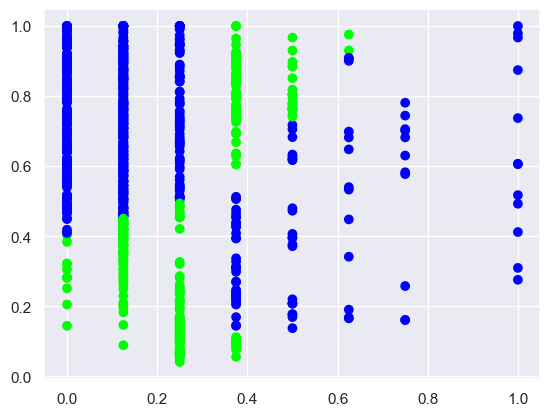

In [80]:
# Let's visualize our new data classes

plt.scatter(new_data['tenure'],new_data['satisfaction'], c = y_predann, cmap='brg')
plt.show();

-----------------------------------------------------